In [1242]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [1243]:
df=pd.read_csv('laptop_data.csv')

In [1244]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1245]:
df.shape

(1303, 12)

In [1246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [1247]:
df.duplicated().sum()

0

In [1248]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [1249]:
df.drop(columns={'Unnamed: 0'},inplace=True)

In [1250]:
def gb(x):
    x=[i for i in x]
    return int(x[0])

df['Ram']=[gb(x) for x in df['Ram']]

#df["Ram"]=df['Ram'].str.replace('GB',"")
#df['Ram'].astype('int32')

In [1251]:
def weight(x):
    x=[i for i in x]
    return float(''.join(x[:-2]))
df['Weight']=[weight(x) for x in df['Weight']]

#df["Weight"]=df['Weight'].str.replace('Kg',"")
#df["Weight"]=df["Weight"].astype('float32')

In [1252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


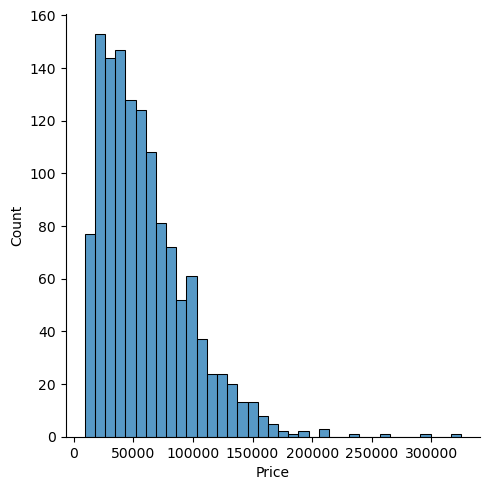

In [1253]:
#EDA

import seaborn as sns

sns.displot(df['Price'])
plt.show()

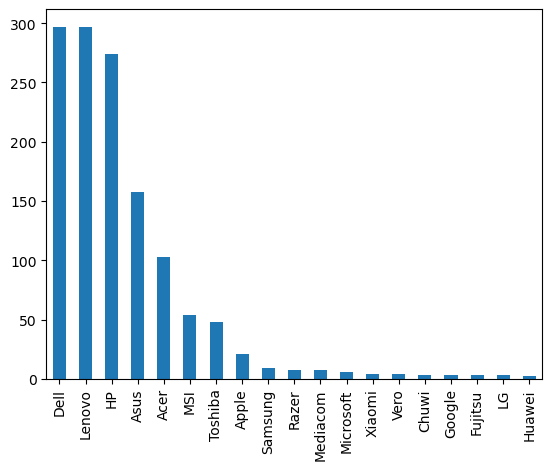

In [1254]:
df['Company'].value_counts().plot(kind='bar')
plt.show()

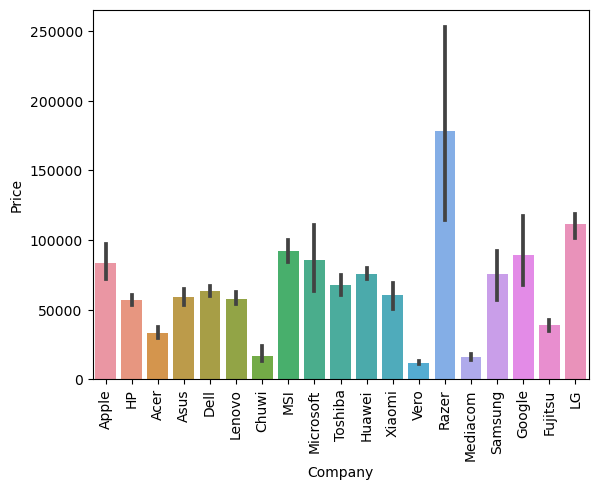

In [1255]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

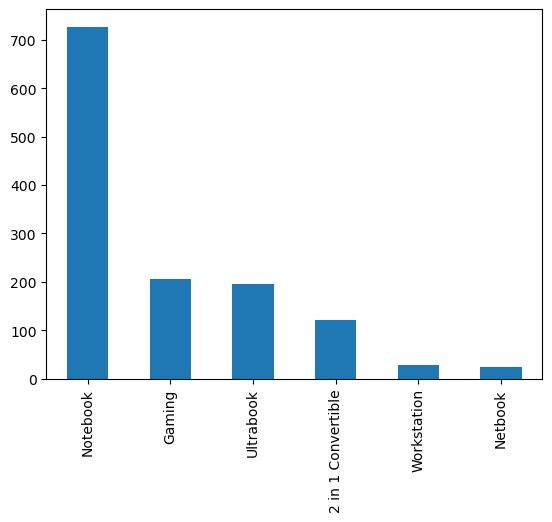

In [1256]:
df['TypeName'].value_counts().plot(kind='bar')
plt.show()

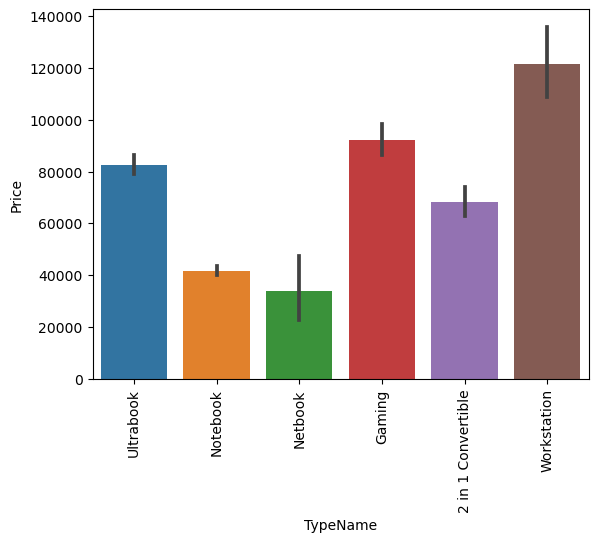

In [1257]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

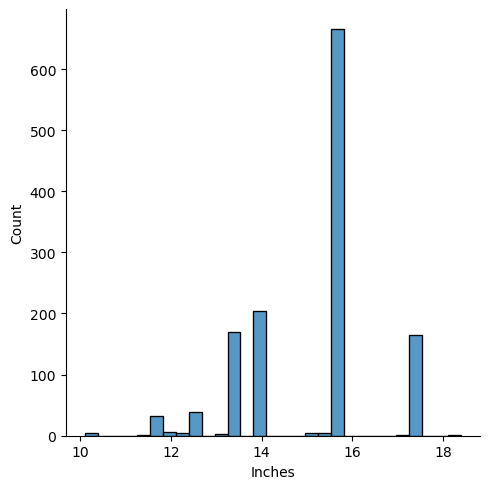

In [1258]:
sns.displot(df['Inches'])
plt.show()

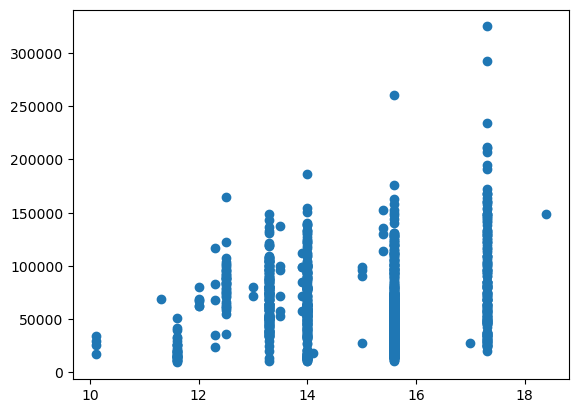

In [1259]:
plt.scatter(x=df['Inches'],y=df['Price'])
plt.show()

In [1260]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [1261]:
def touch(x):
    return 1 if 'Touchscreen' in x else 0
df['Touchscreen']=df['ScreenResolution'].apply(touch)

In [1262]:
df['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

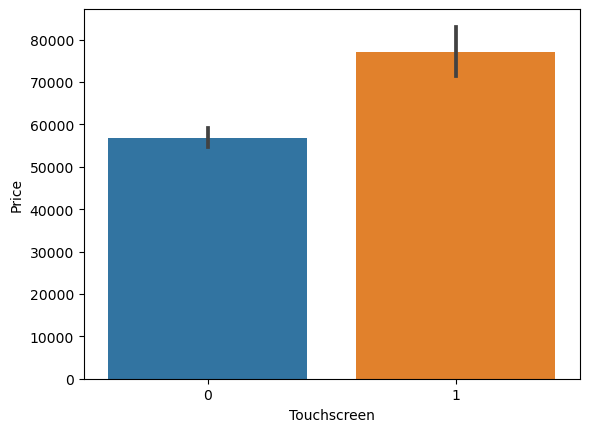

In [1263]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.show()

In [1264]:
def ips(x):
    return 1 if 'IPS' in x else 0
df['IPS']=df['ScreenResolution'].apply(ips)

In [1265]:
df['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

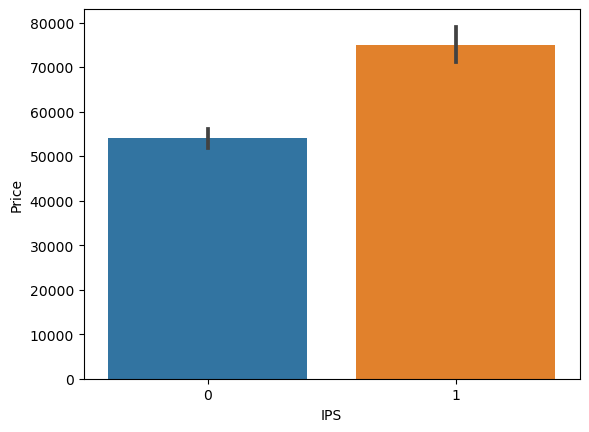

In [1266]:
sns.barplot(x=df['IPS'],y=df['Price'])
plt.show()

In [1267]:
def xres(x):
    x=x.split()
    x=x[-1].split('x')
    return int(x[0])
def yres(x):
    x=x.split()
    x=x[-1].split('x')
    return int(x[1])


df['XRes']=df['ScreenResolution'].apply(xres)
df['YRes']=df['ScreenResolution'].apply(yres)
    

In [1268]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,XRes,YRes
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,1,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,1,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [1269]:
df.corr()['Price']

Inches         0.068197
Ram           -0.160503
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
XRes           0.556529
YRes           0.552809
Name: Price, dtype: float64

In [1270]:
df["PPI"]=((((df['XRes']**2)+(df['YRes']**2))**(0.5))/df['Inches']).astype('float')

In [1271]:
df.corr()['Price']

Inches         0.068197
Ram           -0.160503
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
XRes           0.556529
YRes           0.552809
PPI            0.473487
Name: Price, dtype: float64

In [1272]:
df.drop(columns=['ScreenResolution','Inches','XRes','YRes'],inplace=True)

In [1273]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,1,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,1,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670


In [1274]:
def Cpu_3(x):
    x=x.split()
    return " ".join(x[:3])
df['Cpu Name']=df['Cpu'].apply(Cpu_3)

In [1275]:
def detect_proscessor(text):
    if text=='Intel Core i5' or text=='Intel Core i3' or text=='Intel Core i7':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
df['Cpu Brand']=df['Cpu Name'].apply(detect_proscessor)

In [1276]:
df['Cpu Brand'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

In [1277]:
df.drop(columns=['Cpu Name','Cpu'],inplace=True)

In [1278]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,1,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,1,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7


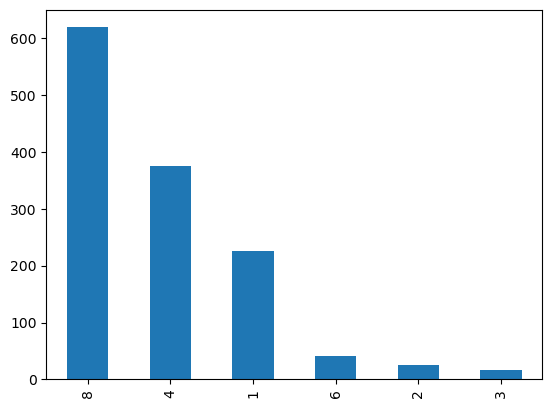

In [1279]:
df['Ram'].value_counts().plot(kind='bar')
plt.show()

In [1280]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [1281]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_8272\3372997381.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\user\AppData\Local\Temp\ipykernel_8272\3372997381.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [1282]:
df.drop(columns=['Memory'],inplace=True)

In [1283]:
df.corr()['Price']

Ram             -0.160503
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [1284]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [1285]:
df['Gpu Brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [1286]:
df.drop(columns=['Gpu'],inplace=True)

In [1287]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [1288]:
def opsys(x):
    x=x.split()
    if x[0]=='Windows':
        return 'Windows'
    elif x[0]=='Mac' or x[0]=='macOS':
        return 'Mac'
    else:
        return 'Other'

df['os']=df['OpSys'].apply(opsys)

In [1289]:
df['os'].value_counts()

Windows    1125
Other       157
Mac          21
Name: os, dtype: int64

In [1290]:
df.drop(columns=['OpSys'],inplace=True)

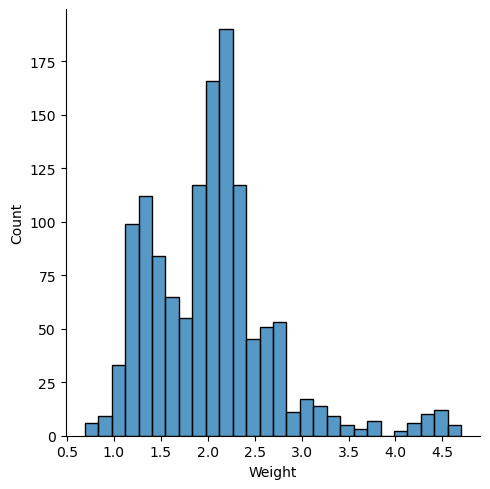

In [1291]:
sns.displot(df['Weight'])
plt.show()

In [1292]:
df.corr()['Price']

Ram           -0.160503
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
PPI            0.473487
HDD           -0.096441
SSD            0.670799
Name: Price, dtype: float64

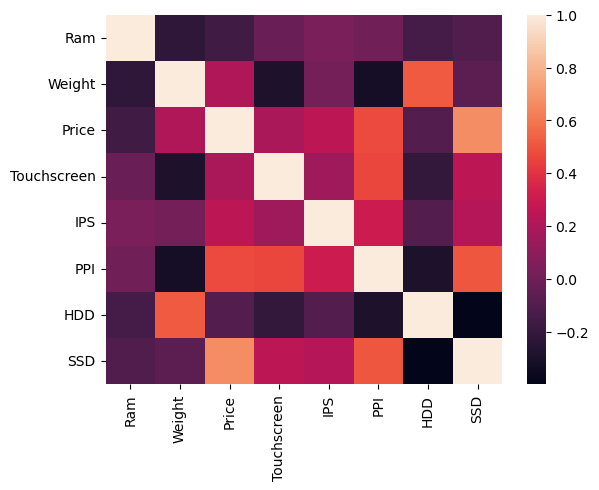

In [1293]:
sns.heatmap(df.corr())
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


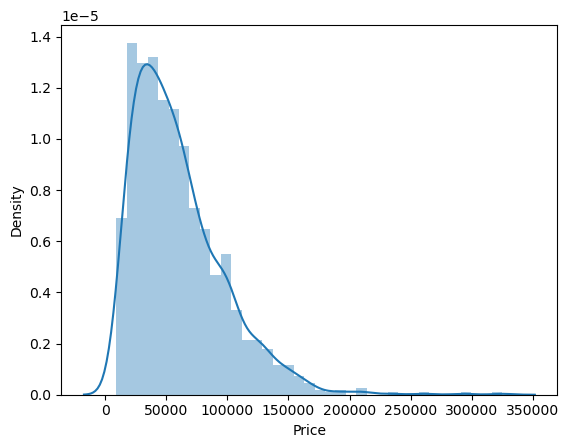

In [1294]:
sns.distplot((df['Price']))
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


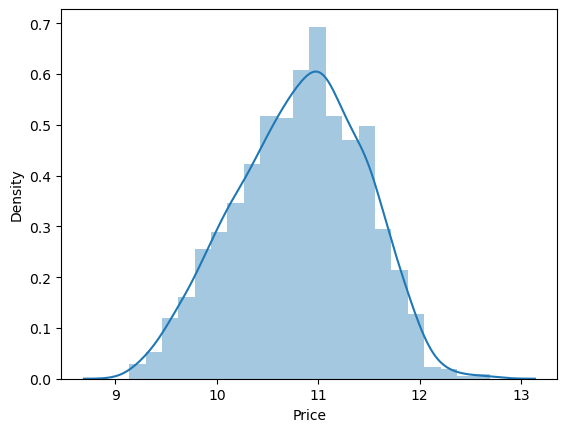

In [1295]:
sns.distplot(np.log(df['Price']))
plt.show()

In [1296]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [1297]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other
3,Apple,Ultrabook,1,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,1,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [1298]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

In [1299]:
from sklearn.model_selection import train_test_split

# rando,_state=>Controls how the data is shuffled before the split is implemented

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

In [1300]:
from sklearn.compose import ColumnTransformer
#.(The ColumnTransformer class provides a way to apply different transformers to different subsets of the columns, and then concatenate the results into a single feature matrix)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
#(One-hot encoding is the process by which categorical data are converted into numerical data for use in machine learning.)
from sklearn.metrics import r2_score,mean_absolute_error

In [1301]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR


# Linear Regerssion

In [1302]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=LinearRegression()
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('r2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.814148722550412
MAE 0.2186688909791306


# Ridge Regression

In [1303]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8122035558916095
MAE 0.219280532361252


# Lasso Regression

In [1304]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8139907461783944
MAE 0.21872311956648408


# KNN

In [1305]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8290880966130183
MAE 0.1952331838577348


# Decision Tree

In [1306]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8241354239166645
MAE 0.20003328471565648


# Random Forest

In [1307]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8852621060109723
MAE 0.16245004572398805


# AdaBoost

In [1308]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7850260836714442
MAE 0.23764161252577362


# Gradient Boost

In [1309]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8973486273666728
MAE 0.1559777663438762


## Exporting the model

In [1310]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8961828996692692
MAE 0.1560491479260841


In [1311]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [1312]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other
3,Apple,Ultrabook,1,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,1,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [1338]:
import math

def price_pred():
    company=input(f"BRAND  {df['Company'].unique()} ")
    typename=input(f"Type  {df['TypeName'].unique()} ")
    ram=int(input(f"Ram  {sorted(df['Ram'].unique())} "))
    weight=float(input(f'weight (in Kg)'))
    touchscreen=input(f'Touchsreen? [Yes,No]')
    ips=input(f'IPS? [Yes,No]')
    screen_size=float(input('screen size? '))
    resolution=input(f'Resolution? ')
    cpu=input(f"Cpu Name  {df['Cpu Brand'].unique()} ")
    hdd=int(input(f"HDD in GB  {df['HDD'].unique()} "))
    ssd=int(input(f"SSD in GB  {df['SSD'].unique()} "))
    gpu=input(f"Gpu Name  {df['Gpu Brand'].unique()} ")
    os=input(f"OS  {df['os'].unique()} ")
    
    if touchscreen=='Yes':
        touchscreen=1
    else:
        touchscreen=0
    
    
    if ips=='Yes':
        ips=1
    else:
        ips=0
    
    x_res=int(resolution.split('x')[0])
    y_res=int(resolution.split('x')[1])
    ppi=(((x_res**2)+(y_res**2))**(0.5))/screen_size
    
    
    query=np.array([company,typename,ram,weight,touchscreen,ips,ppi,cpu,hdd,ssd,gpu,os])
    query=query.reshape(1,12)
    print()
    print('----------------------------------------------x--------------------------------------------------')
    print(f"The predicted price of this laptop is Rs {math.floor(math.exp(float((pipe.predict(query)[0]))))}")


In [1333]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


In [1340]:
price_pred()

BRAND  ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG'] LG
Type  ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation'] Ultrabook
Ram  [1, 2, 3, 4, 6, 8] 4
weight (in Kg)1.5
Touchsreen? [Yes,No]Yes
IPS? [Yes,No]No
screen size? 13.5
Resolution? 1920x1080
Cpu Name  ['Intel Core i5' 'Intel Core i7' 'AMD Processor' 'Intel Core i3'
 'Other Intel Processor'] Intel Core i5
HDD in GB  [   0  500 1000 2000   32  128] 500
SSD in GB  [ 128    0  256  512   32   64 1000 1024   16  768  180  240    8] 128
Gpu Name  ['Intel' 'AMD' 'Nvidia' 'ARM'] Intel
OS  ['Mac' 'Other' 'Windows'] Mac

----------------------------------------------x--------------------------------------------------
The predicted price of this laptop is Rs 50501


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


98715.7710107605